In [58]:
import sys
# !{sys.executable} -m pip install pyvis
# !{sys.executable} -m pip install datashader
!{sys.executable} -m pip install lmfit


  Using cached lmfit-1.0.3.tar.gz (292 kB)
  Using cached asteval-0.9.26.tar.gz (40 kB)
  Using cached uncertainties-3.1.6-py2.py3-none-any.whl (98 kB)
  Created wheel for lmfit: filename=lmfit-1.0.3-py3-none-any.whl size=84398 sha256=ccfd1d33e3e7c72e86a62088f558f2a0c29b3e18af7cea0b225d11950164c291
  Stored in directory: c:\users\kgulp\appdata\local\pip\cache\wheels\d9\b3\6d\1b2ed3dd9940363505d3cdc5a572a3d1622a7976756cc90d1c
  Created wheel for asteval: filename=asteval-0.9.26-py3-none-any.whl size=17641 sha256=88c1afecdae8c52ba1935486e51b33df16bd7b9311825a6c276b0913a0e960a6
  Stored in directory: c:\users\kgulp\appdata\local\pip\cache\wheels\47\4c\d9\c7d96ded3eb3b19c1eb25db6711127ba139dcf13fad2c08bc3
Successfully built lmfit asteval


In [1]:
import main
import pandas as pd
import numpy as np
import math
import scipy
from scipy.spatial import distance, distance_matrix
from scipy.spatial.distance import squareform 
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.optimize import root
from numpy import cosh, zeros_like, mgrid, zeros

import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    
import itertools

In [1302]:
from itertools import groupby
import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance, distance_matrix
from scipy import optimize



def get_pij(df_edges, df_nodes):
    
    print(sum(df_edges['n']/861000))
    # probability group= total_connections of group/connections with other group
    # probability node = (total_connections of group / total amount of persons in that group)/ 
    # (connections with other group/total amount of persons in that group)

    # E|k| = average degree between groups or network? I think between groups
    # We do no know alpha and b

    # f(b) = E|k|  - 1/N * ssummation of all probabilities with p(alpha, b)
    # because all probabilities are the same between the groups we can just say
    # f(b) = E|k| - 1/(N+M)/2 * N*M * prob(alpha, b)
    # This is between a group but for full network it will be different

    # Simulate small proportion for the whole network
    # Calculate it for each node instead of group

            #group1     group2      group3
    
    #group1  d=y        d=y         d=y
    #group2  ..         ..          ...
    #group3  ...        ..          ..


        #group1     group2      group3
    
    #group1  p=y        p=y         p=y
    #group2  ..         ..          ...
    #group3  ...        ..          ..


    # geslacht_src,lft_src,oplniv_src,etngrp_src,geslacht_dst,lft_dst,oplniv_dst,etngrp_dst
    
    df_edges['source_group'] = df_edges['geslacht_src'] + "_" +  df_edges['lft_src'] + '_' + df_edges['etngrp_src']  + '_' +df_edges['oplniv_src'].astype(str)
    df_edges['destination_group'] = df_edges['geslacht_dst'] + "_" +  df_edges['lft_dst'] + '_' + df_edges['etngrp_dst']  + '_' +df_edges['oplniv_dst'].astype(str)
    
    df_edges = df_edges.sort_values(by= ['source_group', 'destination_group'])
    new_df2 = pd.DataFrame()

    new_df = df_edges[['source_group', 'destination_group', 'n']].sort_values(by=['source_group'])

    new_df2[['geslacht_src','lft_src','oplniv_src','etngrp_src','geslacht_dst','lft_dst','oplniv_dst','etngrp_dst']] = df_edges[['geslacht_src','lft_src','oplniv_src','etngrp_src','geslacht_dst','lft_dst','oplniv_dst','etngrp_dst']].apply(lambda x: pd.factorize(x)[0]+1)


    source_group_df = new_df.groupby('source_group').sum().reset_index().sort_values(by=['source_group'])
    destination_group_df = new_df.groupby('destination_group').sum().reset_index().sort_values(by=['destination_group'])
    

    probabilities = []
    distances = []
    coordinates = []
    
    
    
    
    
    df_nodes['group'] = df_nodes['geslacht'] + "_" +  df_nodes['lft'] + '_' + df_nodes['etngrp']  + '_' +df_nodes['oplniv'].astype(str)
    df_nodes = df_nodes.sort_values(by=['group'])
    new_df = pd.DataFrame()
    new_df[['geslacht','lft','oplniv','etngrp']] = df_nodes[['geslacht','lft','oplniv','etngrp']].apply(lambda x: pd.factorize(x)[0])
   
    
    s = (240,240)
    
    distances = np.zeros(s)
    probabilities = np.zeros(s)
    
    probab = {}
    distance = {}
    c = 0
    for i, j in zip(new_df.iterrows(), df_nodes.iterrows()):
        
        row = i[1]
        row2 = j[1]
        
        distance[c] = [[row['geslacht']],[ row['lft']], [row['oplniv']]]
#         distance[c] = [row['geslacht'], row['lft'], row['oplniv']]
     
        z = zeros(5)
        print(row['etngrp'])
        z[row['etngrp']] = 1
        
        distance[c].extend([z])
#         distance[c].extend(z)
        
#         print(distance[c])
#         print(distance[c])
        probab[c] = row2['group']
        
#         print(probab[c])

        c+=1
        
    print('hallo')
    
    character_dict = {}
    for i in range(240):
        n_s_nodes = df_nodes[df_nodes['group'] == probab[i]]['n']
        
        n_edges =  sum(df_edges[df_edges['source_group'] == probab[i]]['n'])
        
        character_dict[i] = (int(n_s_nodes),int(n_edges))
        
#         
        
    
    etn_dist = []
    age_dist = []
    opl_dist = []
    gender_dist = []
    probabilities = []
    
    for i in range(240):
        print(i)
        for j in range(240):
            
#             print()

            a = np.array(list(itertools.chain(*distance[i])))
            b = np.array(list(itertools.chain(*distance[j])))
            
            
            distance_ = np.linalg.norm(a-b)
            
            print(distance_)
            
            gender_dist_v = (np.linalg.norm(np.array(distance[i][0])- np.array(distance[j][0])))
#             print(gender_dist)
            age_dist_v = (np.linalg.norm(np.array(distance[i][1])- np.array(distance[j][1])))
            opl_dist_v = (np.linalg.norm(np.array(distance[i][2])- np.array(distance[j][2])))

            etn_dist_v = (np.linalg.norm(np.array(distance[i][3])- np.array(distance[j][3])))
                
            
            normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)
            
            print((normalized_distance) * (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v))
            print(gender_dist_v * normalized_distance, age_dist_v * normalized_distance, opl_dist_v * normalized_distance
                 ,etn_dist_v * normalized_distance)
            gender_dist.append(gender_dist_v * normalized_distance)
            age_dist.append(age_dist_v * normalized_distance)
            opl_dist.append(opl_dist_v * normalized_distance)
            etn_dist.append(etn_dist_v * normalized_distance)
            
            print(etn_dist)
            

            connections = df_edges[(df_edges['source_group'] == probab[i]) & (df_edges['destination_group'] == probab[j])]['n']
            
            n_s_nodes = character_dict[i][0]
            
            tot_d_edges = character_dict[j][0]
            
            mean_connections = connections/n_s_nodes
            
            
  
            
            if len(connections) == 0:
                probabilities.append(0)
                continue
                
            probabilities.append(float(mean_connections/tot_d_edges))
#             print(float(mean_connections/tot_d_edges))
#             probabilities[i][j] = float(mean_connections/tot_d_edges) 
#             print(probabilities[i][j])
            
    
    
    return etn_dist, age_dist, opl_dist, gender_dist, probabilities

df_nodes = pd.read_csv('./Data/tab_n(with oplniv).csv')

#

'''
Initialize edges for multiple layers
'''
pijs2 = []
dijs2 = []
layers = 'werkschool', 'huishouden', 'familie', 'buren'

# for i in [1, 10, 100]:
df = pd.DataFrame()
for layer in layers:
    df_edges = pd.read_csv(f'./Data/tab_{layer}.csv')

#     print(i)
    print('jall')
    etn_dist, age_dist, opl_dist, gender_dist, probabilities = get_pij(df_edges, df_nodes)
#     print(dij)
#     dijs2.append(dij)
#     pijs2.append(pij)

    df[layer+'_age_d'] = age_dist
    df[layer+'_gender_d'] = gender_dist
    df[layer+'_opl_d'] = opl_dist
    df[layer+'_etn_d'] = etn_dist
    
    
    
    
    df[layer+'_pij'] = probabilities

df.to_csv(f'pij_dij_Distances2.csv')
    

jall
34.10272938443632
0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
0
0
0
1
1
1
2
2
2
3
3
3
4
4
4
hallo
0
0.0
nan
nan nan nan nan
[nan]
1.0
1.0
0.0 0.0 1.0 0.0
[nan, 0.0]
2.0
2.0
0.0 0.0 2.0 0.0
[nan, 0.0, 0.0]
1.4142135623730951
1.4142135623730951
0.0 0.0 0.0 1.4142135623730951
[nan, 0.0, 0.0, 1.4142135623730951]
1.7320508075688772
1.7320508075688772
0.0 0.0 0.7174389352143008 1.0146118723545765
[nan, 0.0, 0.0, 1.4142135623730951, 1.0146118723545765]
2.449489742783178
2.449489742783178
0.0 0.0 1.4348778704286016 1.0146118723545765
[nan, 0.0, 0.0, 1.4142135623730951, 1.0146118723545765, 1

<ipython-input-1302-e77919ffce70>:145: RuntimeWarning: invalid value encountered in double_scalars
  normalized_distance = distance_ / (gender_dist_v + age_dist_v + opl_dist_v + etn_dist_v)


1.7320508075688772
1.7320508075688772
0.0 0.7174389352143008 0.0 1.0146118723545765
[nan, 0.0, 0.0, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765]
2.0
2.0
0.0 0.585786437626905 0.585786437626905 0.8284271247461902
[nan, 0.0, 0.0, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.84763

3.872983346207417
3.872983346207417
0.0 1.8114379768676638 1.207625317911776 0.8539200514279771
[nan, 0.0, 0.0, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 0.0, 0.0, 0.0, 1.0625710998227842, 0.9048367651421368, 0.8539200514279771, 1.0625710998227842, 0.9048367651421368, 0.8539200514279771, 1.0

5.5677643628300215
5.5677643628300215
0.0 3.308547092106206 1.3234188368424824 0.9357984338813325
[nan, 0.0, 0.0, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 0.0, 0.0, 0.0, 1.0625710998227842, 0.9048367651421368, 0.8539200514279771, 1.0625710998227842, 0.9048367651421368, 0.8539200514279771, 1

7.211102550927978
7.211102550927978
0.0 5.361862413897867 0.7659803448425525 1.083259792187558
[nan, 0.0, 0.0, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 0.0, 0.0, 0.0, 1.0625710998227842, 0.9048367651421368, 0.8539200514279771, 1.0625710998227842, 0.9048367651421368, 0.8539200514279771, 1.06

2.23606797749979
2.23606797749979
0.5065608960472843 0.5065608960472843 0.5065608960472843 0.716385289357937
[nan, 0.0, 0.0, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 0.0, 0.0, 0.0, 1.0625710998227842, 0.9048367651421368, 0.8539200514279771, 1.0625710998227842, 0.9048367651421368, 0.85392005

3.605551275463989
3.6055512754639887
0.5621189940750939 1.6863569822252817 0.5621189940750939 0.7949563050885193
[nan, 0.0, 0.0, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 0.0, 0.0, 0.0, 1.0625710998227842, 0.9048367651421368, 0.8539200514279771, 1.0625710998227842, 0.9048367651421368, 0.8539

5.656854249492381
5.656854249492381
0.6008844192893393 3.0044220964466968 1.2017688385786787 0.8497788951776651
[nan, 0.0, 0.0, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 0.0, 0.0, 0.0, 1.0625710998227842, 0.9048367651421368, 0.8539200514279771, 1.0625710998227842, 0.9048367651421368, 0.85392

7.280109889280518
7.280109889280518
0.6990551754751603 4.893386228326122 0.6990551754751603 0.9886133100040756
[nan, 0.0, 0.0, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 0.0, 0.0, 0.0, 1.0625710998227842, 0.9048367651421368, 0.8539200514279771, 1.0625710998227842, 0.9048367651421368, 0.853920

1.7320508075688772
1.7320508075688772
0.0 0.7174389352143008 0.0 1.0146118723545765
[nan, 0.0, 0.0, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 0.0, 0.0, 0.0, 1.0625710998227842, 0.9048367651421368, 0.8539200514279771, 1.0625710998227842, 0.9048367651421368, 0.8539200514279771, 1.0625710998227

3.3166247903554
3.3166247903554
0.0 2.254053690532616 0.0 1.0625710998227842
[nan, 0.0, 0.0, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 0.0, 0.0, 0.0, 1.0625710998227842, 0.9048367651421368, 0.8539200514279771, 1.0625710998227842, 0.9048367651421368, 0.8539200514279771, 1.0625710998227842, 0.

5.291502622129181
5.291502622129181
0.0 3.568485435180471 0.7136970870360942 1.0093200999126157
[nan, 0.0, 0.0, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 0.0, 0.0, 0.0, 1.0625710998227842, 0.9048367651421368, 0.8539200514279771, 1.0625710998227842, 0.9048367651421368, 0.8539200514279771, 1.0

7.211102550927978
7.211102550927978
0.0 5.361862413897867 0.7659803448425525 1.083259792187558
[nan, 0.0, 0.0, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 1.4142135623730951, 1.0146118723545765, 1.0146118723545765, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 1.0146118723545765, 0.8284271247461902, 0.8476385054560919, 0.0, 0.0, 0.0, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 1.0146118723545765, 0.8476385054560919, 0.8259991785472544, 0.0, 0.0, 0.0, 1.0625710998227842, 0.9048367651421368, 0.8539200514279771, 1.0625710998227842, 0.9048367651421368, 0.8539200514279771, 1.06

KeyboardInterrupt: 

In [1255]:
np.array([1,2,0,4,5])/np.array([1,2,0,4,5]) 

<ipython-input-1255-bc3430d4ebc5>:1: RuntimeWarning: invalid value encountered in true_divide
  np.array([1,2,0,4,5])/np.array([1,2,0,4,5])


array([ 1.,  1., nan,  1.,  1.])

In [128]:
df_edges['source_group']

0          Man_[0,20)_Autochtoon_1
1          Man_[0,20)_Autochtoon_1
2          Man_[0,20)_Autochtoon_1
3          Man_[0,20)_Autochtoon_1
4          Man_[0,20)_Autochtoon_1
                   ...            
25160       Vrouw_[70,80)_Overig_3
25161       Vrouw_[70,80)_Overig_3
25162       Vrouw_[70,80)_Overig_3
25163       Vrouw_[70,80)_Overig_3
25164    Vrouw_[70,80)_Surinaams_3
Name: source_group, Length: 25165, dtype: object

In [2]:
from sklearn.metrics import mean_squared_error
from scipy import stats

def prob_function(d_ij,alpha, a, b):
    
    p_ij =a/( 1 + ((1/b * d_ij) ** alpha))
    
    
    return p_ij


def prob_function2(dist,etn_dist, age_dist, gender_dist, opl_dist):
    a,b,c,d = dist
#     print(age_dist, gender_dist, opl_dist, etn_dist)
    # Work/school
    alpha,a,b2 = [2.95464380e+00, 1.43612761e-04, 1.50487064e+00]
    # Family alpha, a, b2 = [1.51901678e+01, 1.95171705e-04, 1.32592328e+00]
    
    # Household
    alpha,a,b2 = [1.04633813e+01, 3.65648417e-05, 1.54797442e+00]
    
    
#     alpha, a, b = [2.60434666e+00, 6.65300420e-05, 9.06747890e-01]
    
#     alpha = 3.74706687e+00
    
    p_ij =a /( 1 + 1/b2*(  opl_dist * d + etn_dist * a+ age_dist * b +gender_dist * c ) ** alpha)
    
 
    
    return p_ij

def prob_function3(dist, a, b, c, d):
    
    
    ge_dist, gender_dist, opl_dist, etn_dist = dist
    
#     alpha, a, b2 = [1,1.95171607e-04,1]
    
    
#     alpha = 3.74706687e+00
    p_ij = age_dist * a +  gender_dist * b +  opl_dist * c + etn_dist* d
    
    return pij
    
 

def get_df(df, name, logistic = True, seperated = True):
    
    if seperated:
        df['dij_a'] = df[name+'_age_d'] 
        df['dij_g'] = df[name+'_gender_d']
        df['dij_o'] = df[name+'_opl_d']
        df['dij_e'] = df[name+'_etn_d']
        df['pij'] = df[name+'_pij']
        df['dij'] = df[name+'_age_d'] + df[name+'_gender_d'] + df[name+'_opl_d'] + df[name+'_etn_d']
    else:
        df['pij'] = df[name+'_pij']
        df['dij'] = df[name+'_dij']
#     df1 = df[df['pij'] != 0]
#     df1[df1['dij'] == 0] = max(df['pij'])
    
#     print(df)
#     df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
#     print(df)
#     pij = df2['pij']
#         pij = (pij - np.min(pij)) / (np.max(pij) - np.min(pij))
        # print(np.median(pij))
        # print(df2)

    
    if logistic:
        
        a = df.groupby(by='dij').mean().reset_index()

        idx = a['pij'].idxmax()

        a = a.iloc[idx]['pij']
        
        df['pij_logistic'] = df['pij']

        df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1 



        df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0
        
#         print(df1['pij_logistic'])
#         df = df1
    return df
    


In [3]:
df = pd.read_csv('./Data/probabilities/pij_dij_Distances.csv')
# print(df)

df = df.fillna(0)

df.replace([np.inf, -np.inf], 0, inplace=True)

df1 = get_df(df,'huishouden', True, True)

print(df1)
a = np.mean(df1[df1['dij'] == 0])['pij']


a = df1.groupby(by='dij').mean().reset_index()

idx = a['pij'].idxmax()

a = a.iloc[idx]['pij']

max(df1['pij'])



# print("checking for infinity")
  
# ds = df1.isin([np.inf, -np.inf])
# print(ds)
  
# # printing the count of infinity values
# print()
# print("printing the count of infinity values")
  
# count = np.isinf(df1).values.sum()
# print("It contains " + str(count) + " infinite values")

df1

       Unnamed: 0  werkschool_age_d  werkschool_gender_d  werkschool_opl_d  \
0               0               0.0                  0.0               0.0   
1               1               0.0                  0.0               1.0   
2               2               0.0                  0.0               2.0   
3               3               0.0                  0.0               0.0   
4               4               0.0                  0.0               1.0   
...           ...               ...                  ...               ...   
57595       57595               0.0                  0.0               1.0   
57596       57596               0.0                  0.0               0.0   
57597       57597               0.0                  0.0               2.0   
57598       57598               0.0                  0.0               1.0   
57599       57599               0.0                  0.0               0.0   

       werkschool_etn_d  werkschool_pij  huishouden_age_d  \
0 

<ipython-input-2-a3b36efc03ff>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-2-a3b36efc03ff>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


,Unnamed: 0,werkschool_age_d,werkschool_gender_d,werkschool_opl_d,werkschool_etn_d,werkschool_pij,huishouden_age_d,huishouden_gender_d,huishouden_opl_d,huishouden_etn_d,...,buren_opl_d,buren_etn_d,buren_pij,dij_a,dij_g,dij_o,dij_e,pij,dij,pij_logistic
0,0,0.0,0.0,0.0,0.000000,0.000276,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000045,0.0,0.0,0.0,0.000000,1.534047e-05,0.000000,0.0
1,1,0.0,0.0,1.0,0.000000,0.000035,0.0,0.0,1.0,0.000000,...,1.0,0.000000,0.000037,0.0,0.0,1.0,0.000000,6.268018e-06,1.000000,0.0
2,2,0.0,0.0,2.0,0.000000,0.000043,0.0,0.0,2.0,0.000000,...,2.0,0.000000,0.000086,0.0,0.0,2.0,0.000000,2.162466e-05,2.000000,0.0
3,3,0.0,0.0,0.0,1.414214,0.000152,0.0,0.0,0.0,1.414214,...,0.0,1.414214,0.000022,0.0,0.0,0.0,1.414214,1.062811e-07,1.414214,0.0
4,4,0.0,0.0,1.0,1.414214,0.000036,0.0,0.0,1.0,1.414214,...,1.0,1.414214,0.000017,0.0,0.0,1.0,1.414214,0.000000e+00,2.414214,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57595,57595,0.0,0.0,1.0,1.414214,0.000000,0.0,0.0,1.0,1.414214,...,1.0,1.414214,0.000000,0.0,0.0,1.0,1.414214,0.000000e+00,2.414214,0.0
57596,57596,0.0,0.0,0.0,1.414214,0.000000,0.0,0.0,0.0,1.414214,...,0.0,1.414214,0.000000,0.0,0.0,0.0,1.414214,0.000000e+00,1.414214,0.0
57597,57597,0.0,0.0,2.0,0.000000,0.000000,0.0,0.0,2.0,0.000000,...,2.0,0.000000,0.000000,0.0,0.0,2.0,0.000000,0.000000e+00,2.000000,0.0
57598,57598,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,...,1.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.000000e+00,1.000000,0.0


In [417]:
df = pd.read_csv('./Data/probabilities/pij_dij_ethnic=1.csv')
# print(df)
df1 = get_df(df,'huishouden', True, False)


a = np.mean(df1[df1['dij'] == 0])['pij']


a = df1.groupby(by='dij').mean().reset_index()

idx = a['pij'].idxmax()

a = a.iloc[idx]['pij']

max(df1['pij'])

df1 = df1.fillna(0)

df1.replace([np.inf, -np.inf], 0, inplace=True)

# print("checking for infinity")
  
# ds = df1.isin([np.inf, -np.inf])
# print(ds)
  
# # printing the count of infinity values
# print()
# print("printing the count of infinity values")
  
# count = np.isinf(df1).values.sum()
# print("It contains " + str(count) + " infinite values")

df1

<ipython-input-365-a3b36efc03ff>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] > (a/2)] = 1
<ipython-input-365-a3b36efc03ff>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pij_logistic'][df['pij_logistic'] < (a/2) ] = 0


,Unnamed: 0,werkschool_dij,werkschool_pij,huishouden_dij,huishouden_pij,familie_dij,familie_pij,buren_dij,buren_pij,pij,dij,pij_logistic
0,0,0.000000,0.000276,0.000000,1.534047e-05,0.000000,0.000028,0.000000,0.000045,1.534047e-05,0.000000,0.0
1,1,1.000000,0.000035,1.000000,6.268018e-06,1.000000,0.000013,1.000000,0.000037,6.268018e-06,1.000000,0.0
2,2,2.000000,0.000043,2.000000,2.162466e-05,2.000000,0.000022,2.000000,0.000086,2.162466e-05,2.000000,0.0
3,3,1.414214,0.000152,1.414214,1.062811e-07,1.414214,0.000012,1.414214,0.000022,1.062811e-07,1.414214,0.0
4,4,1.732051,0.000036,1.732051,0.000000e+00,1.732051,0.000008,1.732051,0.000017,0.000000e+00,1.732051,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
57595,57595,1.732051,0.000000,1.732051,0.000000e+00,1.732051,0.000000,1.732051,0.000000,0.000000e+00,1.732051,0.0
57596,57596,1.414214,0.000000,1.414214,0.000000e+00,1.414214,0.000000,1.414214,0.000000,0.000000e+00,1.414214,0.0
57597,57597,2.000000,0.000000,2.000000,0.000000e+00,2.000000,0.000000,2.000000,0.000000,0.000000e+00,2.000000,0.0
57598,57598,1.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,0.0


In [1279]:
# x_min = optimize.minimize(f2, x0=[9, 0.01], method='BFGS', tol=1e-3)
# x_min
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from scipy import stats


def f2(alpha):
    
    layer = 'buren'
    pij = df1['pij']
    
    age_dist = df1[layer+'_age_d']
    gender_dist = df1[layer+'_gender_d']
    opl_dist = df1[layer+'_opl_d']
    etn_dist = df1[layer+'_etn_d'] 
    

    
#     pij = (pij - np.min(pij)) / (np.max(pij) - np.min(pij))
    
#     print(pij)
    
#     alpha, b = alpha
    a, b, c, d = alpha
    pij_prob =  prob_function(alpha, age_dist, gender_dist, opl_dist, etn_dist)
    
    pij_prob2 = pij_prob.copy()
    pij_prob2[pij_prob >  (a/4)] = 1
    pij_prob2[pij_prob < (a/4)] = 0
    
    print(list(round(pij_prob2)))
#     print(list(pij_prob))
#     print(list(pij))
    
#     rms = mean_absolute_error(pij, pij_prob)
    
#     print(np.mean(pij),np.mean(pij_prob))
    
    rms = accuracy_score(list(pij), list((pij_prob2)))
    
#     print(rms)
    
#     print(1/rms, rms)
    
    return rms
from scipy.optimize import dual_annealing

# pij
b= 1

r_min = 1e-100
r_max = 20


bounds = [np.array([r_min, r_max]), np.array([r_min, r_max]),  np.array([r_min, r_max]),  np.array([r_min, r_max])]

# df1['pij_logistic']
# bounds = [np.array([r_min, r_max])]
# df1
# perform the simulated annealing search

# result = dual_annealing(f2, bounds, maxiter=10000)

0.06411623417437373
          dij  Unnamed: 0  werkschool_age_d  werkschool_gender_d  \
0    0.000000     28799.5          0.000000             0.000000   
1    1.000000     28799.5          0.428571             0.244898   
2    1.414214     28799.5          0.000000             0.000000   
3    2.000000     28799.5          0.934066             0.406593   
4    2.414214     28799.5          0.428571             0.244898   
5    3.000000     28799.5          1.598131             0.504673   
6    3.414214     28799.5          0.934066             0.406593   
7    4.000000     28799.5          2.463918             0.546392   
8    4.414214     28799.5          1.598131             0.504673   
9    5.000000     28799.5          3.430380             0.556962   
10   5.414214     28799.5          2.463918             0.546392   
11   6.000000     28799.5          4.377049             0.573770   
12   6.414214     28799.5          3.430380             0.556962   
13   7.000000     28799.5   

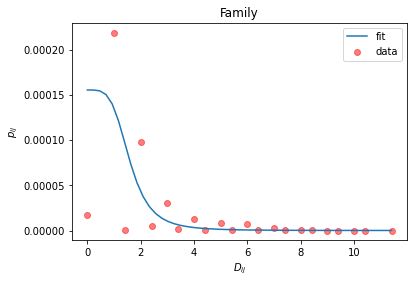

In [406]:
from scipy.optimize import curve_fit
df2 = df1.groupby(by='dij').mean().reset_index()


# df3 = df1[df1['dij'] != 0]
ydata =df1['pij']  
xdata = df1['dij']
x = np.linspace(0, max(xdata))
# plt.scatter(xdata,ydata)
# print(xdata)
 
print(max(df1['pij']))
# p0 = [0,0,a]
popt, pcov = curve_fit(prob_function, xdata, ydata, maxfev=5000, bounds=(0, np.inf))

# print(popt)

# print(df1)
print(df2)
print(list(df2['pij']).index(max(df2['pij'])))
# print(list(df2['dij']).index(max(df2['pij'])))
plt.scatter(df2['dij'], df2['pij'], alpha=.5, c='r',  label="data")
plt.plot(x, prob_function(x, popt[0], popt[1], popt[2]), label = 'fit')
plt.title('Family')
plt.xlabel('$D_{ij}$')
plt.ylabel('$p_{ij}$')
plt.legend()

plt.show()

dij
[1.] [[0.]]
[0.]


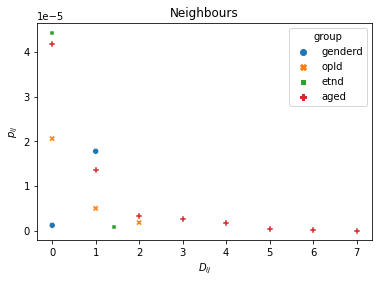

In [8]:
from scipy.optimize import curve_fit
df2 = df1.groupby(by='dij').mean().reset_index()


name = 'huishouden'

groups = ['_gender_d', '_opl_d', '_etn_d','_age_d']


import re

df = pd.DataFrame()
x_values = []
y_values = []
group = []
for g in groups:
    ydata =df1['pij']  
    data_a =  df1.groupby(by=name+g).mean().reset_index()
    xdata_a = data_a[name+g]
    ydata_a = data_a['pij']
    
    x_values.extend(list(xdata_a))
    y_values.extend(list(ydata_a))
    
    group.extend([re.sub('[^a-zA-Z]+', '', g)] * len(ydata_a))
    
df['dij'] = x_values
df['pij'] = y_values
df['group'] = group




# print(max

print('dij')

p0 = [0,0.00006,0.00001,0.00002]
sn.scatterplot(data = df, x='dij', y='pij', hue = 'group', style = 'group')

plt.title('Neighbours')
plt.xlabel('$D_{ij}$')
plt.ylabel('$p_{ij}$')

# huishouden_gender_d huishouden_age_d huishouden_etn_d huishouden_opl_d
xdata = [df1[name+'_opl_d'] ,  df1[name+'_age_d'],df1[name+'_etn_d'],df1[name+'_gender_d']]

xdata = df1['dij_a'],df1['dij_g'] ,df1['dij_o'],df1['dij_e']
# print(xdata)
popt, pcov = curve_fit(prob_function2, xdata, df1['pij'], maxfev=5000, bounds=(0, np.inf))

print(popt,pcov)

perr = np.sqrt(np.diag(pcov))

print(perr)

In [420]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# creating dummies for gender

  
# the independent variables set
X =  df2[[name+'_age_d', name+'_gender_d',  name+'_etn_d']]
  
# VIF dataframe
vif_data = pd.DataFrame()
print(X)
vif_data["feature"] = X.columns


# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

KeyError: "None of [Index(['huishouden_age_d', 'huishouden_gender_d', 'huishouden_etn_d'], dtype='object')] are in the [columns]"

In [9]:


ydata =df1['pij']  
# xdata = df2['dij']
xdata = [df1[name+'_etn_d'], df1[name+'_age_d'], df1[name+'_gender_d'], df1[name+'_opl_d']]

rsq = []

# for a in xdata:
#     for b in xdata:
#         for c in xdata:
#             for d in xdata:
                
#                 if len(set([a.name,b.name,c.name,d.name])) != 4:
#                     continue
#                 data = [a,b,c,d]
#                 popt, pcov = curve_fit(prob_function2, data, df1['pij'], maxfev=5000, bounds=(0, np.inf))
#                 residuals = ydata- prob_function2(data, *popt)

#                 residuals
#                 ss_res = np.sum(residuals**2)
#                 ss_tot = np.sum((ydata-np.mean(ydata))**2)

#                 r_squared = 1 - (ss_res / ss_tot)

#                 print(r_squared)
#                 print(a.name,b.name,c.name,d.name)
#                 rsq.append(r_squared)
# print(max(rsq))


for data in xdata:
    
    
    popt, pcov = curve_fit(prob_function2, data, df1['pij'], maxfev=5000, bounds=(0, np.inf))
#     print(popt)
    residuals = ydata- prob_function2(data, *popt)

    residuals
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)

    r_squared = 1 - (ss_res / ss_tot)

    print(r_squared)

    rsq.append(r_squared)

-0.004260687234708627
-0.004260687234708627
-0.004260687234708627
-0.004260687234708627


In [4]:

def prob_function2(dist, opl_dist):
    a = dist
#     print(age_dist, gender_dist, opl_dist, etn_dist)
    # Work/school
    alpha,a,b2 = [2.95464380e+00, 1.43612761e-04, 1.50487064e+00]
    # Family alpha, a, b2 = [1.51901678e+01, 1.95171705e-04, 1.32592328e+00]
    
    # Household
    alpha,a,b2 = [1.04633813e+01, 3.65648417e-05, 1.54797442e+00]
    
    
#     alpha, a, b = [2.60434666e+00, 6.65300420e-05, 9.06747890e-01]
    
#     alpha = 3.74706687e+00
    
    p_ij =a /( 1 + 1/b2*(  opl_dist *a  ) ** alpha)
    
 
    
    return p_ij

In [887]:
l = []
for i in df2.iterrows():
    x = i[1]['dij']
    y = i[1]['pij']
#     print(abs(y -  prob_function(x, popt[0])))
    l.append(abs( (y -  prob_function(x, popt[0]))**2))
    
print(np.mean(l))

1.0538517176204938e-09


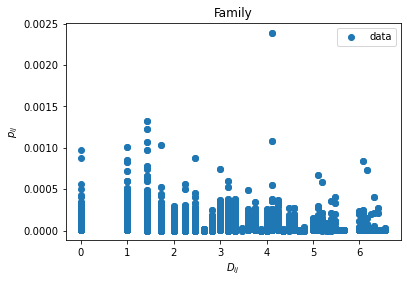

In [815]:
plt.scatter(df1['dij'], df1['pij'],  label="data")

plt.title('Family')
plt.xlabel('$D_{ij}$')
plt.ylabel('$p_{ij}$')
plt.legend()

1756
[[-0.3235912]]


Text(0, 0.5, '$p_{ij}$')

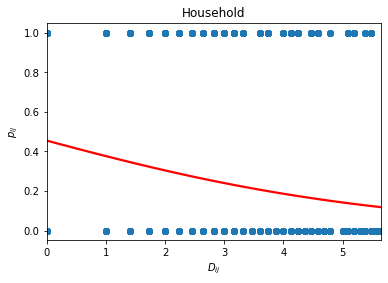

In [71]:
df2 = df1.groupby(by='dij').mean().reset_index()

ydata =df1['pij_logistic']  
xdata = df1['dij']

xdata = (np.array(xdata).reshape(len(xdata), 1))
clf = LogisticRegression(random_state=0).fit(xdata, ydata)

x = np.linspace(0, max(xdata))

# clf.predict(X[:2, :])

# clf.predict_proba(X[:2, :])


print(list(ydata).count(1))
print(clf.coef_)

plt.scatter(xdata ,ydata)


# clf.score(X, y)

# p0 = [max(ydata), np.median(xdata)] 

# p0
# popt, pcov = curve_fit(prob_function, xdata, ydata, maxfev=5000, p0=p0, bounds=(0, np.inf))



sn.regplot(x=xdata, y=ydata, logistic=True, ci=None, line_kws={'color': 'red'})
# plt.scatter(df2['dij'], df2['pij'], alpha=.5, c='r',  label="data")
# plt.plot(x, prob_function(x, popt[0], popt[1]), label = 'fit')
plt.title('Household')
plt.xlabel('$D_{ij}$')
plt.ylabel('$p_{ij}$')
# plt.legend()

# plt.show()

In [87]:
result

     fun: 1.9302040301442104e-05
 message: ['Maximum number of iteration reached']
    nfev: 170784
    nhev: 0
     nit: 10000
    njev: 18155
  status: 0
 success: True
       x: array([4.58058260e-05, 4.88569150e-02, 3.81459346e-01, 8.16783077e-01])

In [801]:
df = pd.read_csv('pij_dij_Distances.csv')
# print(df)
df1 = get_df(df,'huishouden', True, True)


a = np.mean(df1[df1['dij'] == 0])['pij']


a = df1.groupby(by='dij').mean().reset_index()

idx = a['pij'].idxmax()

a = a.iloc[idx]['pij']

# max(df1['pij'])

<ipython-input-764-bc27a4120500>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pij_logistic'][df1['pij_logistic'] > (a/2)] = 1
<ipython-input-764-bc27a4120500>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pij_logistic'][df1['pij_logistic'] < (a/2) ] = 0


       Unnamed: 0  werkschool_age_d  werkschool_gender_d  werkschool_opl_d  \
0               0               0.0                  0.0               0.0   
1               1               0.0                  0.0               1.0   
2               2               0.0                  0.0               2.0   
3               3               0.0                  0.0               0.0   
4               4               0.0                  0.0               1.0   
...           ...               ...                  ...               ...   
57595       57595               0.0                  0.0               1.0   
57596       57596               0.0                  0.0               0.0   
57597       57597               0.0                  0.0               2.0   
57598       57598               0.0                  0.0               1.0   
57599       57599               0.0                  0.0               0.0   

       werkschool_etn_d  werkschool_pij  huishouden_age_d  \
0 

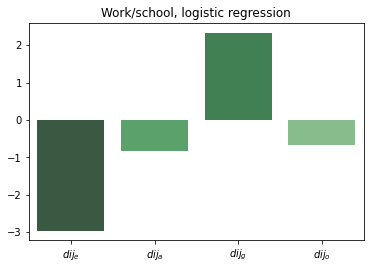

In [391]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
print(df1)
g = df1.groupby('pij_logistic')
g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

X = g[['dij_e', 'dij_a', 'dij_g', 'dij_o']]
pij = g['pij_logistic']

clf = LogisticRegression(penalty='none', solver="newton-cg")

clf.fit(X, pij)
# get importance
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

pal = sn.color_palette("Greens_d", len(importance))
rank = abs(importance).argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
sn.barplot(x = [abs(x) for x in range(len(importance))], y = importance, palette=np.array(pal)[rank])


# pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title('Work/school, logistic regression')
pyplot.xticks([0,1,2,3],['$dij_e$', '$dij_a$', '$dij_g$', '$dij_o$'] )
# sn.color_palette('Set2')
pyplot.show()

In [335]:
custom_palette = {}
importance2 = list(np.sort(abs(importance)))
for i in importance:
    print(i)
    importance2.index(abs(i))
    
    custom_palette[i]

-2.9430845072204965
-0.9905096691315196
2.9056210060319323
-0.8575624458190156


Feature: 0, Score: -0.00003
Feature: 1, Score: -0.00001
Feature: 2, Score: 0.00002
Feature: 3, Score: -0.00001


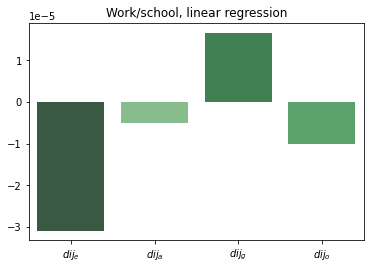

In [374]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
pij = df1['pij']
X = df1[[ 'dij_e', 'dij_a', 'dij_g', 'dij_o' ]]

reg = LinearRegression().fit(X, pij)

# get importance
importance = reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pal = sn.color_palette("Greens_d", len(importance))
rank = abs(importance).argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
sn.barplot(x = [abs(x) for x in range(len(importance))], y = importance, palette=np.array(pal)[rank])


# pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title('Work/school, linear regression')
pyplot.xticks([0,1,2,3],['$dij_e$', '$dij_a$', '$dij_g$', '$dij_o$'] )
# sn.color_palette('Set2')
pyplot.show()

In [377]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# X = g[[ 'dij_e', 'dij_a', 'dij_g', 'dij_o' ]]
# pij = g['pij_logistic']

# print(df1.size)
train = df1.head(int(0.66 * df1.size))
test = df1.tail(int(0.33 * df1.size))


g = train.groupby('pij_logistic')
g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

X_train = train[[ 'dij_e', 'dij_a', 'dij_g', 'dij_o' ]]
y_train = train['pij_logistic']

clf = LogisticRegression(penalty='none', solver="newton-cg")
# clf = RandomForestClassifier()


X_test = test[[ 'dij_e', 'dij_a', 'dij_g', 'dij_o' ]]
y_test = test['pij_logistic']


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print(tn, fn, tp, fp)
# print(y_pred)

# list(y_pred).count(1)

0.9922916666666667
[[57156     0]
 [  444     0]]
57156 444 0 0


Text(0.5, 0, '$p_{ij}$')

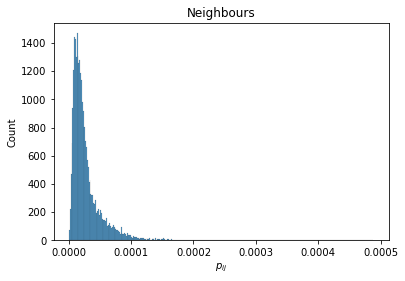

In [797]:
sn.histplot(df1['pij'])
plt.title('Neighbours')
# plt.xlabel('$D_{ij}$')
plt.xlabel('$p_{ij}$')

In [383]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MeanClassifier(BaseEstimator, ClassifierMixin):  
    """An example of classifier"""

    def __init__(self, a=1.234):
        """
        Called when initializing the classifier
        """

        sel.a = a


    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.

        Note: assert is not a good choice here and you should rather
        use try/except blog with exceptions. This is just for short syntax.
        """

        assert (type(self.intValue) == int), "intValue parameter must be integer"
        assert (type(self.stringParam) == str), "stringValue parameter must be string"
        assert (len(X) == 20), "X must be list with numerical values."
        
        popt, pcov = curve_fit(prob_function2, X, ydata, maxfev=5000, bounds=(0, np.inf))
        self.treshold_ = a/2  # mean + intValue
        
        self.a,self.b,self.c,self.d = popt
        return self

    def _meaning(self, x):
        # returns True/False according to fitted classifier
        # notice underscore on the beginning
        
        x = probab_function2(x, self.a, self.b,self.c,self.d)
        return( True if x >= self.treshold_ else False )

    def predict(self, X, y=None):
        try:
            getattr(self, "treshold_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return([self._meaning(x) for x in X])

    def score(self, X, y=None):
        # counts number of values bigger than mean
        return(sum(self.predict(X))) 